In [1]:
#importing the dependency and downloading data from kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

C:\Users\User1\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `f

In [2]:
# load the melbourne housing dataset to a Pandas DataFrame
house_price=pd.read_csv('C:/Users/User1/Downloads/melb_data/melb_data.csv')

In [3]:
house_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# checking the number of row and columns
house_price.shape

(13580, 21)

In [5]:
# check for missing values
house_price.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
# replacing the null value with their mean
house_price[['Car','YearBuilt']]=house_price[['Car','YearBuilt']].replace(np.NaN,house_price[['Car','YearBuilt']].mean())

In [7]:
house_price[['BuildingArea','CouncilArea']]=house_price[['BuildingArea','CouncilArea']].replace(np.NaN,house_price[['BuildingArea','CouncilArea']].mean())

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
house_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:
# getting some statistical measure of the dataset
house_price.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960433,3990.669241,392.002962,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [10]:
#taking the correlation of various columns
correlation=house_price.corr()

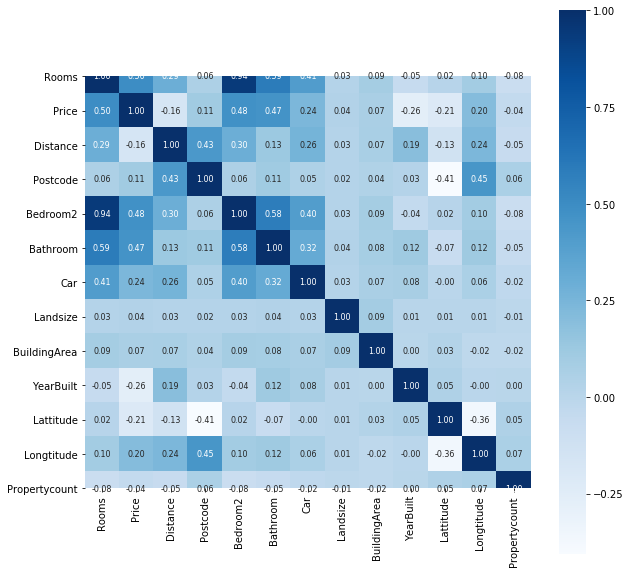

In [11]:
    #constructing a heatmap to understand the correlation
#correlation represents how a value or more relates to others. Eg if price shows +1.00 and distance shows -0.16 in the heat map,this simply means,as price of houses increases, their distance reduces
#cbar is color bar 
#cmap means color of map 
#fmt is floating point, it could be 2 decimal place as in the map below or 1 decimal place or less/more
#square means represent with square box
#annot means the feature column names and sizes
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#only include columns shown on 'describe' dataframe and remove categorical data/non numerical
house_price.drop(['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname'],axis=1,inplace=True)
house_price.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [13]:
# Splitting the data and Target for tranning and testing. # for dropping column, axis=1, for row, axis=0 

In [14]:
X=house_price.drop(['Price'],axis=1)
Y=house_price['Price']

In [15]:
#data/input
X.head()


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [16]:
#Target/output
Y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [17]:
# Splitting the data into Training data and Test data
# 0.2 is 20% of the data for testing
# random_state 2 is splitting the data into 2, input and output or data and result
X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

In [18]:
# to check the number of total data, training data, testing data, in rows and columns
print(X.shape,X_train.shape,X_test.shape)

(13580, 12) (10864, 12) (2716, 12)


In [19]:
#X_train dataset
X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
6941,2,12.4,3060.0,2.0,1.0,2.0,621.0,109.00000,1960.000000,-37.71640,144.96660,5070.0
12969,4,7.5,3040.0,4.0,4.0,3.0,543.0,259.00000,2015.000000,-37.74633,144.89644,9264.0
10653,5,27.0,3196.0,5.0,6.0,3.0,900.0,178.00000,1960.000000,-38.04105,145.12160,2546.0
11652,3,16.1,3111.0,3.0,1.0,2.0,726.0,151.96765,1964.684217,-37.80279,145.19974,4790.0
4871,3,4.5,3181.0,3.0,2.0,1.0,112.0,100.00000,1900.000000,-37.85170,145.00560,7717.0


In [20]:
#X_test dataset
X_test.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
13531,4,2.4,3121.0,4.0,1.0,4.0,418.0,151.96765,1964.684217,-37.82368,145.00271,14949.0
3244,2,10.5,3081.0,2.0,1.0,1.0,428.0,84.00000,1950.000000,-37.74180,145.05130,2947.0
5499,3,6.6,3011.0,3.0,2.0,1.0,309.0,149.00000,1910.000000,-37.80700,144.89800,2417.0
10556,5,16.5,3049.0,5.0,2.0,2.0,626.0,151.96765,1964.684217,-37.67688,144.88996,2474.0
11369,3,38.0,3199.0,3.0,1.0,4.0,578.0,123.00000,1984.000000,-38.13743,145.16702,17055.0


In [21]:
# model training with XGBoost Regressor Algorithm
# loading the model
model=XGBRegressor()

In [22]:
# training the model with X_train(input)and Y_train(output)
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

  Accuracy of Train data

In [23]:
train_data_prediction=model.predict(X_train)



In [24]:
# root mean square
score_1= metrics.r2_score(Y_train,train_data_prediction)
score_1

0.9456405240868472

In [25]:
# Mean absolute error
score_2=metrics.mean_absolute_error(Y_train,train_data_prediction)
score_2

103464.36868758054

Accuracy of Test data

In [26]:
#prediction on test data
test_data_prediction=model.predict(X_test)


In [27]:
# checking accuracy of test data using the root mean square and mean absolute error method
# root mean square
score_1= metrics.r2_score(Y_test,test_data_prediction)
score_1

0.7265671218281775

In [28]:
# Mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)
score_2

178792.46239155697

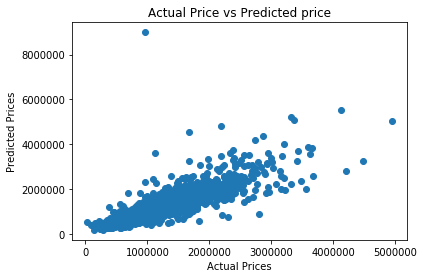

In [29]:
# using a scattered plot to visualize the closeness between the original data points and model prediction for the testing data
plt.scatter(test_data_prediction,Y_test)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted price') 
plt.show()